In [1]:
%matplotlib notebook
import longview as lv

In [2]:
cli_train = tw.WatchClient()
cli_test = tw.WatchClient()
plot = tw.mpl.LinePlot()

<IPython.core.display.Javascript object>


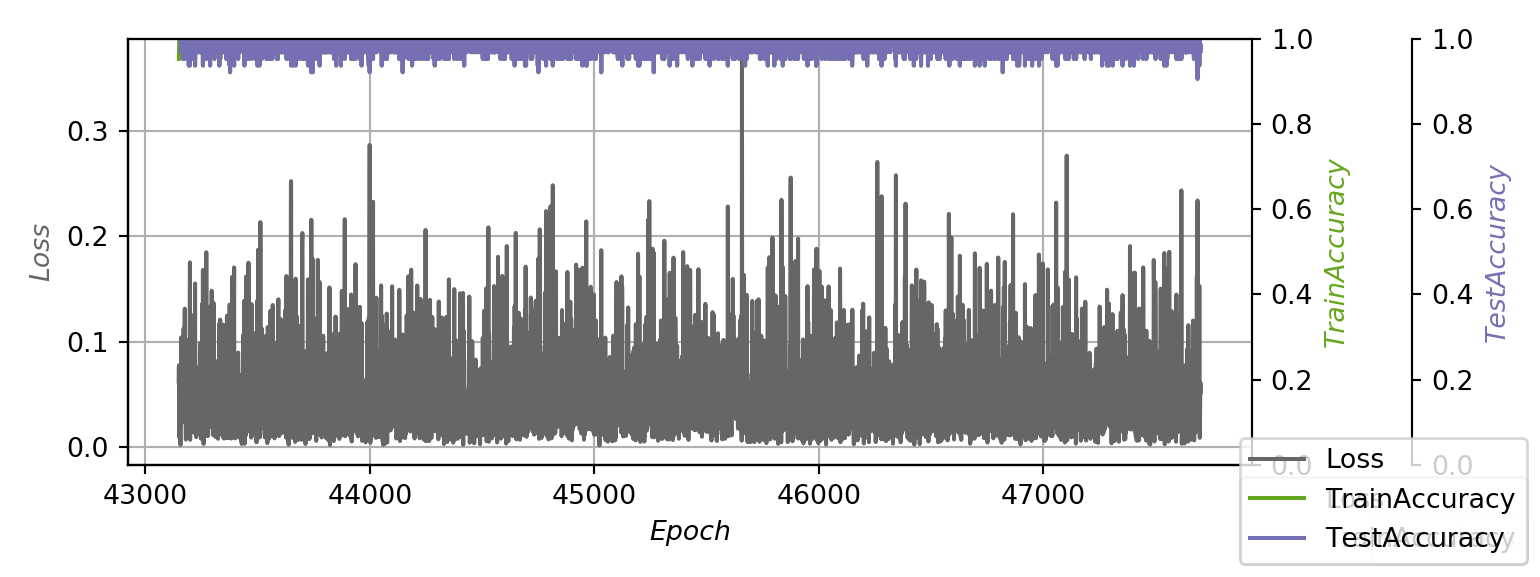

In [3]:
train_batch_loss = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_loss, l)')
plot.add(train_batch_loss, xtitle='Epoch', ytitle='Loss')

In [4]:
train_batch_accuracy = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.add(train_batch_accuracy, xtitle='Epoch', ytitle='TrainAccuracy', yrange=(0,1), clear_after_end=False)

In [5]:
test_batch_accuracy = cli_test.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.add(test_batch_accuracy, xtitle='Epoch', ytitle='TestAccuracy', yrange=(0,1), clear_after_end=False)

<IPython.core.display.Javascript object>


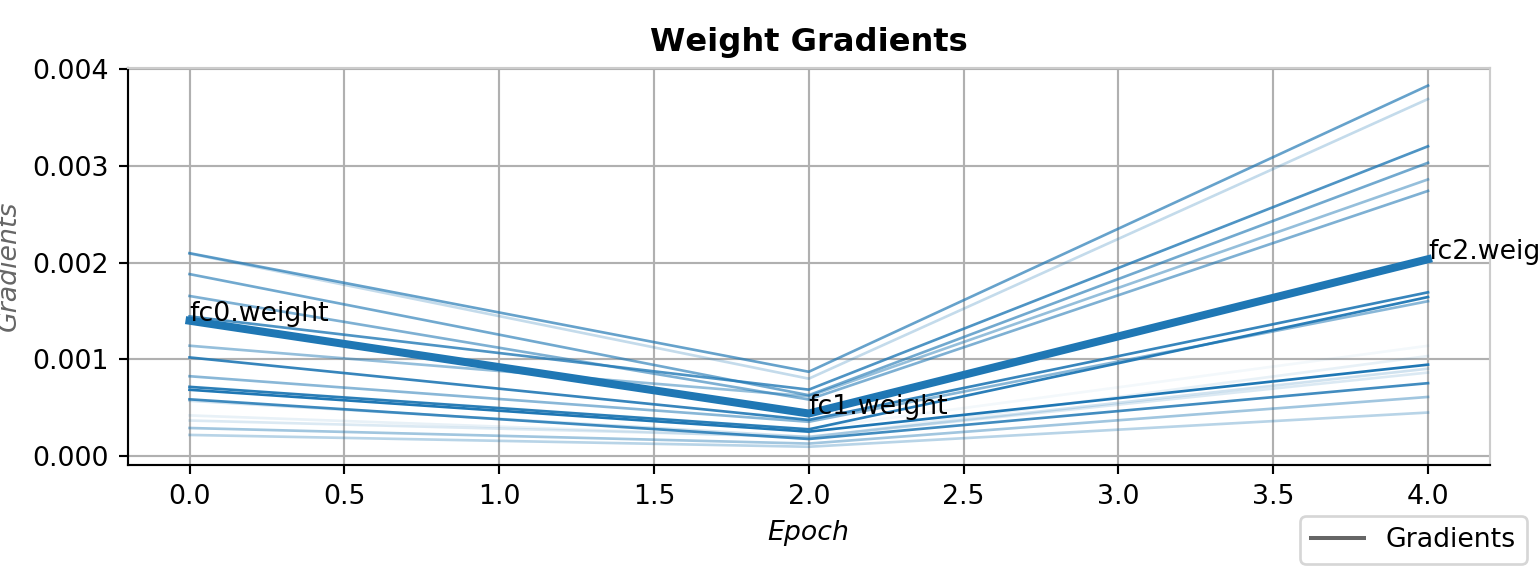

In [6]:
grads = cli_train.create_stream('batch', 'map(lambda d:agg_params(d.model, lambda p: p.grad.abs().mean().item()), l)', throttle=3)
grad_plot = tw.mpl.LinePlot("Weight Gradients")
grad_plot.add(grads, xtitle='Epoch', ytitle='Gradients', clear_after_each=True, clear_after_end=False, history_len=20)